In [14]:
%matplotlib notebook
pl.style.use('classic')
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [2]:
# define some "inputs"
x = np.array([1, 0, 1])

# define some weights
w = np.array([3, 2, 1])

In [5]:
(x @ w) > 0
# x.dot(w)

True

In [6]:
class Neuron():
    """A basic perceptron class we can build on
    """
    
    def __init__(self, n_inputs):
        self.weights = np.zeros(n_inputs)
    
    def evaluate(self, x):
        # evaluate the output of the neuron in response to input x
        return self.activation( x @ self.weights )
    
    def activation(self, a):
        return a

In [7]:
n = Neuron(3)
n.evaluate(x)

0.0

In [10]:
n.weights = w
n.evaluate(x)

4

In [11]:
def sigmoid_activation(self, a):
    return 1/(1+np.exp(a))

Neuron.activation = sigmoid_activation

In [12]:
n.evaluate(x)

0.017986209962091559

### On to scikit-learn


In [34]:
digits = load_digits()
X, y = digits.data, digits.target
#y = (y==1).astype(int)

<IPython.core.display.Javascript object>


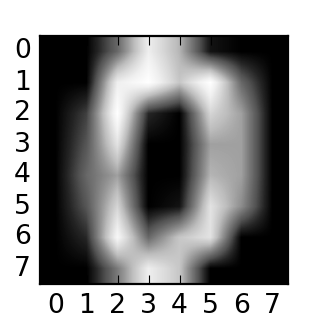

In [35]:
pl.figure(figsize=(2,2))
pl.imshow(digits.images[0], cmap=pl.cm.Greys_r)

In [38]:
model_names = ['Perceptron', 'Logistic Regression', 'SVM']
models = [ Perceptron(), 
           LogisticRegression(), 
           SVC(kernel='linear')  ]

for name,model in zip(model_names, models):
    scores = cross_val_score(model, X, y)
    print(name, np.mean(scores))

Perceptron 0.884822530628
Logistic Regression 0.91822044597
SVM 0.943799727629


In [33]:
p = Perceptron()
p.fit(X,y)
p.coef_

print(p.predict([X[1]]))

print(X[1] @ p.coef_.T)


[1]
[ 8320.]


In [27]:
p.coef_

array([[   0.,  -21.,  -43.,   54., -297.,  109.,  -32.,   -5.,   -1.,
        -188., -201.,  -74.,   46.,   93., -140.,   -6.,    8.,  -23.,
          35.,  299.,  237.,  -97.,  -55.,   -5.,    2.,  -36.,    1.,
          69.,  -15.,   68., -135.,    0.,    0., -105.,  -36.,  -41.,
           0.,   -8., -138.,    0.,   -1., -168.,  -69.,   27.,   11.,
        -130., -182.,   -1.,   -3.,  -60.,  -35.,   61.,   39.,  -12.,
        -119.,   59.,   -1.,  -24., -144.,  -12.,    2.,  123.,  -28.,
          61.]])

<IPython.core.display.Javascript object>


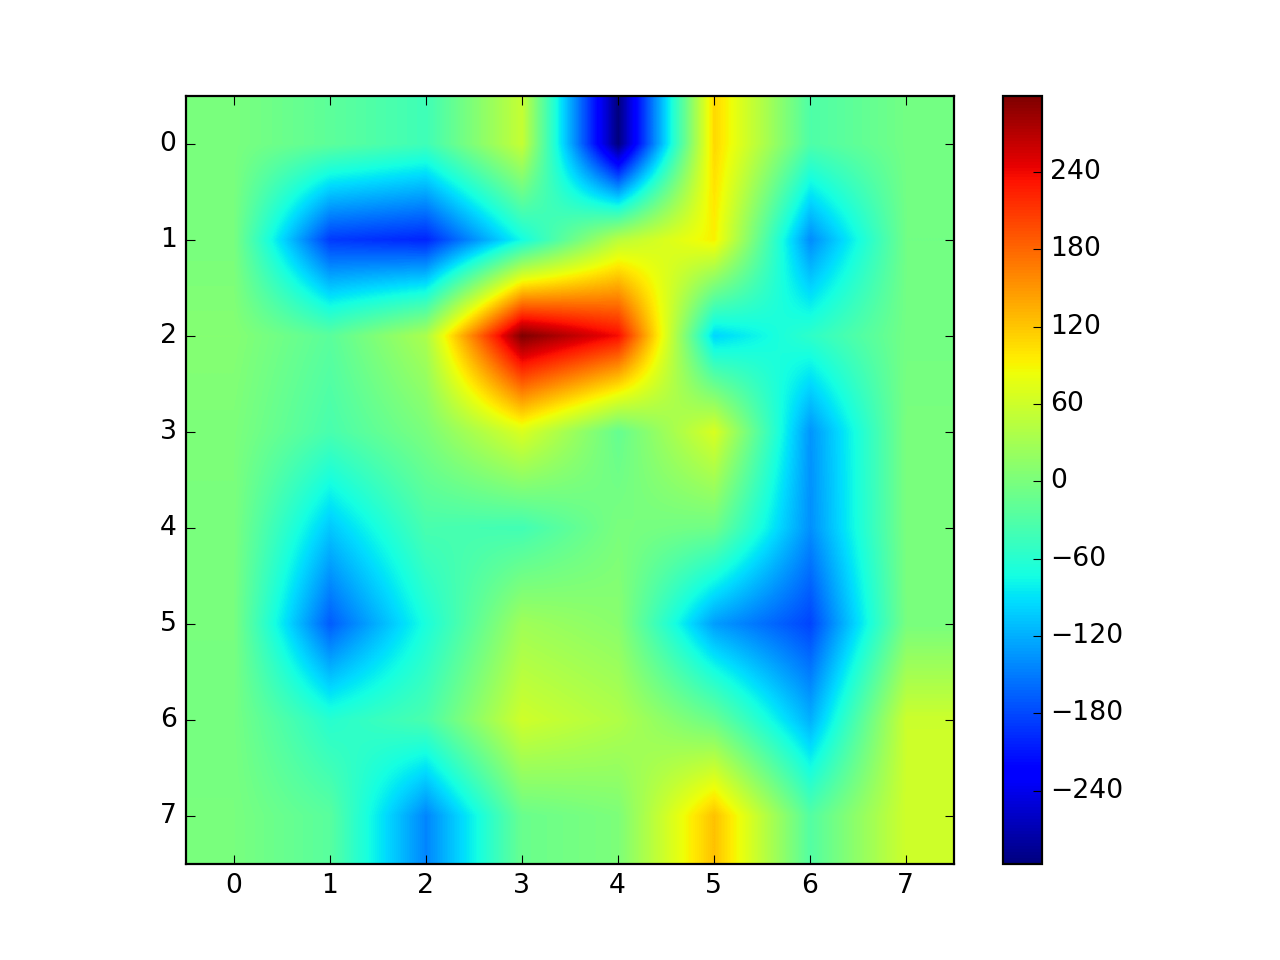

In [30]:
pl.figure()
pl.imshow(p.coef_.reshape([8,8]))
pl.colorbar()